In [1]:

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
pd.set_option("display.max_columns",None)


In [9]:

datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","last_flag"]



dfkdd_train = pd.read_table("D:\KDDTrain+.txt", sep=",", names=datacols) # change path to where the dataset is located.
dfkdd_train = dfkdd_train.iloc[:,:-1] # removes an unwanted extra field

# Load NSL_KDD test dataset
dfkdd_test = pd.read_table("D:\KDDTest+.txt", sep=",", names=datacols)
dfkdd_test = dfkdd_test.iloc[:,:-1]

In [107]:
print("Training data has rows {} and columns {}".format(dfkdd_train.shape[0],dfkdd_train.shape[1]))

Training data has rows 125973 and columns 42


In [108]:
print("Test data has rows {} and columns {}".format(dfkdd_test.shape[0],dfkdd_test.shape[1]))

Test data has rows 22544 and columns 42


In [109]:
dfkdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
dfkdd_train["num_outbound_cmds"].value_counts()


0    125973
Name: num_outbound_cmds, dtype: int64

In [73]:
dfkdd_test["num_outbound_cmds"].value_counts()


0    22544
Name: num_outbound_cmds, dtype: int64

In [10]:
dfkdd_train=dfkdd_train.drop(["num_outbound_cmds"],axis=1)
dfkdd_test=dfkdd_test.drop(["num_outbound_cmds"],axis=1)

In [35]:
dfkdd_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [36]:
dfkdd_test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [37]:
dfkdd_train["label"].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [11]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [12]:
# Apply attack class mappings to the dataset
dfkdd_train['label'] = dfkdd_train['label'].apply(lambda v: mapping[v])
dfkdd_test['label'] = dfkdd_test['label'].apply(lambda v: mapping[v])

In [13]:
dfkdd_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [14]:
# Attack Class Distribution
attack_class_freq_train = dfkdd_train[['label']].apply(lambda x: x.value_counts())
attack_class_freq_test = dfkdd_test[['label']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,label,frequency_percent_train,label,frequency_percent_test
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


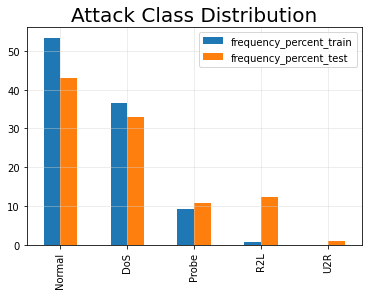

In [15]:
# Attack class bar plot
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

In [172]:
print(dfkdd_train.isnull().sum())


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [83]:
dfkdd_train.duplicated().value_counts()

False    125964
True          9
dtype: int64

In [16]:
dfkdd_train.drop_duplicates(inplace=True)


In [174]:
dfkdd_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,Normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,Normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS


In [85]:
dfkdd_test.duplicated().value_counts()

False    22541
True         3
dtype: int64

In [127]:
#dfkdd_test.drop_duplicates(keep='last', inplace=True)


In [128]:
dfkdd_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [88]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in dfkdd_train.columns:
    if dfkdd_train[col_name].dtypes == 'object' :
        unique_cat = len(dfkdd_train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(dfkdd_train['service'].value_counts().sort_values(ascending=False).head())


Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'attack_class' has 5 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [89]:
# Test set
print('Test set:')
for col_name in dfkdd_test.columns:
    if dfkdd_test[col_name].dtypes == 'object' :
            unique_cat = len(dfkdd_test[col_name].unique())
            print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'attack_class' has 5 categories


In [90]:
trainservice=dfkdd_train['service'].tolist()
testservice= dfkdd_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference


['service_aol',
 'service_http_2784',
 'service_red_i',
 'service_urh_i',
 'service_harvest',
 'service_http_8001']

In [91]:
# Attack Class Distribution
attack_class_freq_train = dfkdd_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = dfkdd_test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

#attack_class_freq_train



,attack_class,frequency_percent_train,attack_class,frequency_percent_test
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.09
Probe,11647,9.25,2418,10.73
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


In [17]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# selecting numeric attributes columns from data
numeric_col = dfkdd_train.select_dtypes(include='number').columns

In [10]:
numeric_col

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = dfkdd_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(dfkdd_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(dfkdd_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)



In [178]:
dfkdd_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = dfkdd_train.select_dtypes(include=['object']).copy()
cattest = dfkdd_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['label'], axis=1)
cat_Ytrain = traincat[['label']].copy()

In [137]:
sc_traindf


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110253,-0.007679,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.289115,-0.639564,-0.624902,-0.224553,-0.376402
1,-0.110253,-0.007738,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.621024,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,-1.321354,0.482160,-0.374537,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402
2,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,0.339590,-0.299285,1.602584,1.605024,-0.374377,-0.374447,-1.389593,0.038503,-0.374537,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402
3,-0.110253,-0.007723,-0.002891,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.690887,-0.313052,-0.189276,-0.184564,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-1.533925,1.258683,1.066483,-0.439097,-0.383002,0.066229,-0.572117,-0.602464,-0.387651,-0.345100
4,-0.110253,-0.007729,-0.004814,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.472565,0.058656,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.028117,0.734273,1.258683,1.066483,-0.439097,-0.480113,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,0.872294,-0.037713,1.602584,1.605024,-0.374377,-0.374447,-1.184875,-0.016954,-0.374537,0.734273,-0.818965,-0.938215,-0.121513,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402
125960,-0.107182,-0.007745,-0.004883,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,0.734273,1.159318,0.977385,-0.386166,-0.447743,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402
125961,-0.110253,-0.007382,-0.004823,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.725818,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,0.734273,-0.773799,-0.893667,-0.121513,-0.480113,-0.289115,0.979171,-0.624902,-0.355031,-0.376402
125962,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,0.522980,-0.271751,1.602584,1.605024,-0.374377,-0.374447,-1.366847,-0.072411,-0.374537,0.734273,-0.972530,-1.094136,-0.174444,-0.480113,-0.289115,1.608679,1

In [20]:
train_x = pd.concat([sc_traindf,enctrain,dfkdd_train['label']],axis=1)
train_x.dropna(inplace=True)

train_y = train_x['label']
train_x=train_x.drop(["label"],axis=1)

train_x.shape

(125955, 40)

In [21]:
test_df = pd.concat([sc_testdf,testcat],axis=1)
test_df.shape

(22544, 41)

In [183]:
train_x


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,label
0,-0.110253,-0.007679,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.289115,-0.639564,-0.624902,-0.224553,-0.376402,1.0,20.0,9.0,Normal
1,-0.110253,-0.007738,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.621024,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,-1.321354,0.482160,-0.374537,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,2.0,44.0,9.0,Normal
2,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,0.339590,-0.299285,1.602584,1.605024,-0.374377,-0.374447,-1.389593,0.038503,-0.374537,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,1.0,49.0,5.0,DoS
3,-0.110253,-0.007723,-0.002891,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.690887,-0.313052,-0.189276,-0.184564,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-1.533925,1.258683,1.066483,-0.439097,-0.383002,0.066229,-0.572117,-0.602464,-0.387651,-0.345100,1.0,24.0,9.0,Normal
4,-0.110253,-0.007729,-0.004814,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.472565,0.058656,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.028117,0.734273,1.258683,1.066483,-0.439097,-0.480113,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,1.0,24.0,9.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,0.872294,-0.037713,1.602584,1.605024,-0.374377,-0.374447,-1.184875,-0.016954,-0.374537,0.734273,-0.818965,-0.938215,-0.121513,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,1.0,24.0,9.0,Normal
125960,-0.107182,-0.007745,-0.004883,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,0.734273,1.159318,0.977385,-0.386166,-0.447743,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,1.0,24.0,9.0,Normal
125961,-0.110253,-0.007382,-0.004823,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.725818,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,0.734273,-0.773799,-0.893667,-0.121513,-0.480113,-0.289115,0.979171,-0.624902,-0.355031,-0.376402,1.0,24.0,9.0,Normal
125962,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,

In [134]:
train_x.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.110253,-0.007679,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.289115,-0.639564,-0.624902,-0.224553,-0.376402,1.0,20.0,9.0
1,-0.110253,-0.007738,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.621024,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,-1.321354,0.482160,-0.374537,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,2.0,44.0,9.0
2,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,0.339590,-0.299285,1.602584,1.605024,-0.374377,-0.374447,-1.389593,0.038503,-0.374537,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,1.0,49.0,5.0
3,-0.110253,-0.007723,-0.002891,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.690887,-0.313052,-0.189276,-0.184564,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-1.533925,1.258683,1.066483,-0.439097,-0.383002,0.066229,-0.572117,-0.602464,-0.387651,-0.345100,1.0,24.0,9.0
4,-0.110253,-0.007729,-0.004814,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.472565,0.058656,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.028117,0.734273,1.258683,1.066483,-0.439097,-0.480113,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,1.0,24.0,9.0


In [99]:
train_x.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.110253,-0.007679,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.289115,-0.639564,-0.624902,-0.224553,-0.376402,1.0,20.0,9.0
1,-0.110253,-0.007738,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.621024,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,-1.321354,0.482160,-0.374537,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,2.0,44.0,9.0
2,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,0.339590,-0.299285,1.602584,1.605024,-0.374377,-0.374447,-1.389593,0.038503,-0.374537,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,1.0,49.0,5.0
3,-0.110253,-0.007723,-0.002891,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.690887,-0.313052,-0.189276,-0.184564,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-1.533925,1.258683,1.066483,-0.439097,-0.383002,0.066229,-0.572117,-0.602464,-0.387651,-0.345100,1.0,24.0,9.0
4,-0.110253,-0.007729,-0.004814,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.472565,0.058656,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.028117,0.734273,1.258683,1.066483,-0.439097,-0.480113,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,1.0,24.0,9.0


In [101]:
test_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,-0.155545,-0.021990,-0.096902,-0.017625,-0.059108,-0.019461,-0.113529,-0.144009,-0.890479,-0.016495,-0.049457,-0.012639,-0.01426,-0.012912,-0.024022,-0.052322,-0.022096,-0.171083,1.167921,-0.237222,-0.348471,-0.347416,1.830607,1.838139,-1.698349,-0.131125,-0.386992,0.650155,-1.169908,-1.305639,-0.137968,-0.431890,-0.229997,-0.358123,-0.352776,1.980373,1.929723,1.0,45.0,1.0,0.0
1,-0.155545,-0.021990,-0.096902,-0.017625,-0.059108,-0.019461,-0.113529,-0.144009,-0.890479,-0.016495,-0.049457,-0.012639,-0.01426,-0.012912,-0.024022,-0.052322,-0.022096,-0.171083,0.443939,-0.338271,-0.348471,-0.347416,1.830607,1.838139,-1.771090,-0.131125,-0.386992,0.650155,-1.250425,-1.397455,-0.137968,-0.431890,-0.229997,-0.358123,-0.352776,1.980373,1.929723,1.0,45.0,1.0,0.0
2,-0.154123,0.005470,-0.096902,-0.017625,-0.059108,-0.019461,-0.113529,-0.144009,-0.890479,-0.016495,-0.049457,-0.012639,-0.01426,-0.012912,-0.024022,-0.052322,-0.022096,-0.171083,-0.607003,-0.338271,-0.348471,-0.347416,-0.572925,-0.564899,0.629342,-0.362840,-0.386992,-0.636570,-0.489984,0.002748,-0.228680,1.559764,0.004203,-0.358123,-0.352776,-0.602570,-0.565329,1.0,19.0,9.0,1.0
3,-0.155545,-0.021947,-0.096902,-0.017625,-0.059108,-0.019461,-0.113529,-0.144009,-0.890479,-0.016495,-0.049457,-0.012639,-0.01426,-0.012912,-0.024022,-0.052322,-0.022096,-0.171083,-0.607003,0.380299,-0.348471,-0.347416,-0.572925,-0.564899,0.629342,-0.362840,3.556941,-2.029636,-0.749429,0.897961,-0.410105,2.833117,3.048793,-0.358123,-0.352776,-0.602570,-0.565329,0.0,13.0,9.0,2.0
4,-0.154834,-0.021990,-0.096196,-0.017625,-0.059108,-0.019461,-0.113529,-0.144009,-0.890479,-0.016495,-0.049457,-0.012639,-0.01426,-0.012912,-0.024022,-0.052322,-0.022096,-0.171083,-0.607003,-0.259678,-0.348471,0.054806,1.830607,0.636620,0.629342,-0.362840,2.570957,-1.753150,-0.489984,-0.685876,0.360950,-0.333940,0.004203,-0.358123,-0.352776,1.541273,1.206158,1.0,55.0,2.0,2.0


In [102]:
train_x.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.110253,-0.007679,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.289115,-0.639564,-0.624902,-0.224553,-0.376402,1.0,20.0,9.0
1,-0.110253,-0.007738,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.621024,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,-1.321354,0.482160,-0.374537,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,2.0,44.0,9.0
2,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,0.339590,-0.299285,1.602584,1.605024,-0.374377,-0.374447,-1.389593,0.038503,-0.374537,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,1.0,49.0,5.0
3,-0.110253,-0.007723,-0.002891,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.690887,-0.313052,-0.189276,-0.184564,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-1.533925,1.258683,1.066483,-0.439097,-0.383002,0.066229,-0.572117,-0.602464,-0.387651,-0.345100,1.0,24.0,9.0
4,-0.110253,-0.007729,-0.004814,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.472565,0.058656,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.028117,0.734273,1.258683,1.066483,-0.439097,-0.480113,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,1.0,24.0,9.0


In [103]:
test_df.columns
testlabel = dfkdd_test['attack_class']

In [104]:
test_df= test_df.drop(['attack_class'],axis=1)
test_df.columns


Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type',
       'service', 'flag'],
      dtype='object')

# FEATURE SELECTION USING RFE WITH RANDOM FOREST

In [23]:
from sklearn.feature_selection import RFE
import itertools
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'protocol_type',
 'service',
 'flag']

In [26]:
train_x_RandomForest = train_x[selected_features]
train_x_RandomForest.head()

,src_bytes,dst_bytes,count,srv_count,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,protocol_type,service,flag
0,-0.007679,-0.004919,-0.717085,-0.354352,0.771327,-0.349697,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.224553,1.0,20.0,9.0
1,-0.007738,-0.004919,-0.621024,-0.368119,-1.321354,0.482160,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.387651,2.0,44.0,9.0
2,-0.007763,-0.004919,0.339590,-0.299285,-1.389593,0.038503,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.387651,1.0,49.0,5.0
3,-0.007723,-0.002891,-0.690887,-0.313052,0.771327,-0.349697,-1.533925,1.258683,1.066483,-0.439097,-0.383002,-0.387651,1.0,24.0,9.0
4,-0.007729,-0.004814,-0.472565,0.058656,0.771327,-0.349697,0.734273,1.258683,1.066483,-0.439097,-0.480113,-0.387651,1.0,24.0,9.0


In [27]:
RandomForest_Classifier = RandomForestClassifier(criterion='entropy')


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(RandomForest_Classifier, train_x_RandomForest, train_y, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(RandomForest_Classifier, train_x_RandomForest, train_y, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(RandomForest_Classifier, train_x_RandomForest, train_y, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(RandomForest_Classifier, train_x_RandomForest, train_y, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.93918 (+/- 0.04093)
Precision: nan (+/- nan)
Recall: nan (+/- nan)
F-measure: nan (+/- nan)


In [31]:
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing

X_train_, X_test_, y_train_, y_test_ = train_test_split(train_x_RandomForest,train_y, test_size=0.20) 



# train random forest classifier on train data after splitting

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

RandomForest_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1) 

RandomForest_Classifier.fit(X_train_,y_train_)
accuracy = metrics.accuracy_score(y_test_, RandomForest_Classifier.predict(X_test_))
confusion_matrix = metrics.confusion_matrix(y_test_, RandomForest_Classifier.predict(X_test_))
classification = metrics.classification_report(y_test_, RandomForest_Classifier.predict(X_test_))

print()
print('============================== {} Model Evaluation ==============================')
print()
#print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()








============================== {} Model Evaluation ==============================


Model Accuracy:
 0.9394625064507165

Confusion matrix:
 [[ 8746   271   207     0     0]
 [  176 13111   174    16     0]
 [  329   166  1769     0     0]
 [    4   171     0    40     1]
 [    0    10     0     0     0]]

Classification report:
               precision    recall  f1-score   support

         DoS       0.95      0.95      0.95      9224
      Normal       0.95      0.97      0.96     13477
       Probe       0.82      0.78      0.80      2264
         R2L       0.71      0.19      0.29       216
         U2R       0.00      0.00      0.00        10

    accuracy                           0.94     25191
   macro avg       0.69      0.58      0.60     25191
weighted avg       0.94      0.94      0.94     25191




# feature selection for logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import itertools
logreg =LogisticRegression()

# create the RFE model and select 10 attributes
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['land',
 'logged_in',
 'root_shell',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'protocol_type',
 'flag']

In [39]:
train_x_logisticRegression = train_x[selected_features]
train_x_logisticRegression.head()




,land,logged_in,root_shell,rerror_rate,srv_rerror_rate,same_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,protocol_type,flag
0,-0.014089,-0.809310,-0.036653,-0.374377,-0.374447,0.771327,-0.374537,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.224553,1.0,9.0
1,-0.014089,-0.809310,-0.036653,-0.374377,-0.374447,-1.321354,-0.374537,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.387651,2.0,9.0
2,-0.014089,-0.809310,-0.036653,-0.374377,-0.374447,-1.389593,-0.374537,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.387651,1.0,5.0
3,-0.014089,1.235621,-0.036653,-0.374377,-0.374447,0.771327,-0.374537,-1.533925,1.258683,1.066483,-0.439097,-0.383002,-0.387651,1.0,9.0
4,-0.014089,1.235621,-0.036653,-0.374377,-0.374447,0.771327,-0.028117,0.734273,1.258683,1.066483,-0.439097,-0.480113,-0.387651,1.0,9.0


In [40]:
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
X_train_, X_test_, y_train_, y_test_ = train_test_split(train_x_logisticRegression,train_y, test_size=0.20) 


In [41]:
from sklearn import metrics


logreg.fit(X_train_,y_train_)
accuracy = metrics.accuracy_score(y_test_, logreg.predict(X_test_))
confusion_matrix = metrics.confusion_matrix(y_test_, logreg.predict(X_test_))
classification = metrics.classification_report(y_test_, logreg.predict(X_test_))

print()
print('============================== {} Model Evaluation ==============================')
print()
#print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()








============================== {} Model Evaluation ==============================


Model Accuracy:
 0.8393473859711802

Confusion matrix:
 [[ 8261   695   162     0     0]
 [  839 12629    46     0     0]
 [ 1254   826   254     0     0]
 [   12   197     0     0     0]
 [    0    16     0     0     0]]

Classification report:
               precision    recall  f1-score   support

         DoS       0.80      0.91      0.85      9118
      Normal       0.88      0.93      0.91     13514
       Probe       0.55      0.11      0.18      2334
         R2L       0.00      0.00      0.00       209
         U2R       0.00      0.00      0.00        16

    accuracy                           0.84     25191
   macro avg       0.45      0.39      0.39     25191
weighted avg       0.81      0.84      0.81     25191




# Random OverSampling

# Random over sampling and  Random Forest

In [52]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(train_x, train_y)
#print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Resampled dataset shape Counter({'Normal': 67338, 'DoS': 67338, 'R2L': 67338, 'Probe': 67338, 'U2R': 67338})


In [57]:
X_res.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
count,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000,336690.000000
mean,0.008395,-0.000520,-0.001320,-0.008607,-0.019764,0.272393,0.177366,0.045324,0.085609,0.001776,0.748306,-0.004376,0.001357,0.049846,0.003081,0.002295,-0.001763,0.116672,-0.084451,-0.038683,-0.077174,-0.076112,-0.034372,-0.033604,0.098028,-0.000549,-0.017586,-0.137765,-0.092018,0.058465,0.011147,0.225360,0.161425,-0.072973,-0.075307,-0.043531,-0.036272,0.992575,33.585292,7.374686
std,1.033530,0.757106,0.613046,0.623809,0.889726,4.429657,1.656976,1.387374,1.014480,0.710671,4.563829,0.919722,0.720329,1.564684,1.036342,1.067349,0.611660,1.473507,0.976545,0.912806,0.959588,0.959985,0.957272,0.960308,0.962974,1.030733,0.996950,1.074576,0.980671,0.998915,1.030916,1.208795,1.399303,0.958339,0.958982,0.944471,0.959656,0.409899,17.834112,2.680638
min,-0.110253,-0.007763,-0.004919,-0.014089,-0.089490,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.734551,-0.381886,-0.637241,-0.631961,-0.374377,-0.374447,-1.503326,-0.349697,-0.374537,-1.836352,-1.044796,-1.160960,-0.439097,-0.480113,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,0.000000,0.000000,0.000000
25%,-0.110253,-0.007763,-0.004919,-0.014089,-0.089490,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.725818,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,-1.207621,-0.349697,-0.374537,-1.362550,-0.972530,-1.049588,-0.439097,-0.480113,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,1.000000,20.000000,5.000000
50%,-0.110253,-0.007755,-0.004919,-0.014089,-0.089490,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.664688,-0.299285,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,0.734273,-0.656366,0.331427,-0.333236,-0.447743,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,1.000000,24.000000,9.000000
75%,-0.110253,-0.007711,-0.004666,-0.014089,-0.089490,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,0.383255,-0.147848,0.101901,0.106244,-0.374377,-0.374447,0.771327,-0.016954,-0.374537,0.734273,1.258683,1.066483,-0.068582,0.329150,-0.111443,0.484558,-0.490275,-0.387651,-0.376402,1.000000,49.000000,9.000000
max,16.363697,235.059056,325.736970,70.975771,11.743058,208.811642,35.718275,110.493235,1.235621,312.357785,27.282762,44.266645,306.048262,88.825895,90.145265,90.526907,354.912665,10.252786,3.727938,6.653015,1.602584,1.605024,2.746292,2.715254,0.771327,5.196020,3.474570,0.734273,1.258683,1.066483,4.853967,2.756939,8.594480,1.608679,1.618875,2.874295,2.753802,2.000000,69.000000,10.000000


In [58]:
from sklearn.feature_selection import RFE
import itertools
RandomForest_Classifier = RandomForestClassifier(criterion='entropy')

# create the RFE model and select 10 attributes
rfe = RFE(RandomForest_Classifier, n_features_to_select=15)
rfe = rfe.fit(X_res, y_res)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_res.columns)]
selected_features_over_sampling_RandomForest = [v for i, v in feature_map if i==True]

selected_features_over_sampling_RandomForest

['src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'protocol_type',
 'service',
 'flag']

In [60]:
train_x_RandomForest_Classifier = X_res[selected_features_over_sampling_RandomForest]
train_x_RandomForest_Classifier.head()



,src_bytes,dst_bytes,count,srv_count,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,protocol_type,service,flag
0,-0.007679,-0.004919,-0.717085,-0.354352,0.771327,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.289115,-0.224553,1.0,20.0,9.0
1,-0.007738,-0.004919,-0.621024,-0.368119,-1.321354,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.289115,-0.387651,2.0,44.0,9.0
2,-0.007763,-0.004919,0.339590,-0.299285,-1.389593,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.289115,-0.387651,1.0,49.0,5.0
3,-0.007723,-0.002891,-0.690887,-0.313052,0.771327,-1.533925,1.258683,1.066483,-0.439097,-0.383002,0.066229,-0.387651,1.0,24.0,9.0
4,-0.007729,-0.004814,-0.472565,0.058656,0.771327,0.734273,1.258683,1.066483,-0.439097,-0.480113,-0.289115,-0.387651,1.0,24.0,9.0


In [61]:
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
X_train_, X_test_, y_train_, y_test_ = train_test_split(train_x_RandomForest_Classifier,y_res, test_size=0.20) 


In [62]:
from sklearn import metrics


RandomForest_Classifier.fit(X_train_,y_train_)
accuracy = metrics.accuracy_score(y_test_, RandomForest_Classifier.predict(X_test_))
confusion_matrix = metrics.confusion_matrix(y_test_, RandomForest_Classifier.predict(X_test_))
classification = metrics.classification_report(y_test_, RandomForest_Classifier.predict(X_test_))

print()
print('============================== {} Model Evaluation ==============================')
print()
#print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()



============================== {} Model Evaluation ==============================


Model Accuracy:
 0.9862633282841783

Confusion matrix:
 [[12977   166   254     0     0]
 [  210 12996   211    65     0]
 [   15     4 13339     0     0]
 [    0     0     0 13592     0]
 [    0     0     0     0 13509]]

Classification report:
               precision    recall  f1-score   support

         DoS       0.98      0.97      0.98     13397
      Normal       0.99      0.96      0.98     13482
       Probe       0.97      1.00      0.98     13358
         R2L       1.00      1.00      1.00     13592
         U2R       1.00      1.00      1.00     13509

    accuracy                           0.99     67338
   macro avg       0.99      0.99      0.99     67338
weighted avg       0.99      0.99      0.99     67338




# Random over sampling and logistic Regression

In [45]:
train_x

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.110253,-0.007679,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.289115,-0.639564,-0.624902,-0.224553,-0.376402,1.0,20.0,9.0
1,-0.110253,-0.007738,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.621024,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,-1.321354,0.482160,-0.374537,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,2.0,44.0,9.0
2,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,0.339590,-0.299285,1.602584,1.605024,-0.374377,-0.374447,-1.389593,0.038503,-0.374537,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,1.0,49.0,5.0
3,-0.110253,-0.007723,-0.002891,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.690887,-0.313052,-0.189276,-0.184564,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-1.533925,1.258683,1.066483,-0.439097,-0.383002,0.066229,-0.572117,-0.602464,-0.387651,-0.345100,1.0,24.0,9.0
4,-0.110253,-0.007729,-0.004814,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.472565,0.058656,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.028117,0.734273,1.258683,1.066483,-0.439097,-0.480113,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,1.0,24.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,0.872294,-0.037713,1.602584,1.605024,-0.374377,-0.374447,-1.184875,-0.016954,-0.374537,0.734273,-0.818965,-0.938215,-0.121513,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,1.0,24.0,9.0
125960,-0.107182,-0.007745,-0.004883,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,0.734273,1.159318,0.977385,-0.386166,-0.447743,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,1.0,24.0,9.0
125961,-0.110253,-0.007382,-0.004823,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,-0.725818,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,0.734273,-0.773799,-0.893667,-0.121513,-0.480113,-0.289115,0.979171,-0.624902,-0.355031,-0.376402,1.0,24.0,9.0
125962,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,-0.002818,-0.097534,0.522980,-0.2

In [63]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(train_x, train_y)
#print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Resampled dataset shape Counter({'Normal': 67338, 'DoS': 67338, 'R2L': 67338, 'Probe': 67338, 'U2R': 67338})


In [64]:
from sklearn.linear_model import LogisticRegression
import itertools
logreg =LogisticRegression()

# create the RFE model and select 10 attributes
rfe = RFE(logreg, n_features_to_select=15)

rfe = rfe.fit(X_res, y_res)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_res.columns)]
selected_features_over_sampling = [v for i, v in feature_map if i==True]

selected_features_over_sampling


['duration',
 'wrong_fragment',
 'hot',
 'num_access_files',
 'is_guest_login',
 'srv_rerror_rate',
 'same_srv_rate',
 'srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'protocol_type',
 'flag']

In [65]:
train_x_logisticRegression = X_res[selected_features_over_sampling]
train_x_logisticRegression.head()



,duration,wrong_fragment,hot,num_access_files,is_guest_login,srv_rerror_rate,same_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,protocol_type,flag
0,-0.110253,-0.08949,-0.095079,-0.041223,-0.097534,-0.374447,0.771327,-0.374537,-0.818965,-0.782294,-0.280305,0.070186,-0.224553,1.0,9.0
1,-0.110253,-0.08949,-0.095079,-0.041223,-0.097534,-0.374447,-1.321354,-0.374537,-1.035763,-1.160960,2.736741,2.368492,-0.387651,2.0,9.0
2,-0.110253,-0.08949,-0.095079,-0.041223,-0.097534,-0.374447,-1.389593,-0.374537,-0.809932,-0.938215,-0.174444,-0.480113,-0.387651,1.0,5.0
3,-0.110253,-0.08949,-0.095079,-0.041223,-0.097534,-0.374447,0.771327,-0.374537,1.258683,1.066483,-0.439097,-0.383002,-0.387651,1.0,9.0
4,-0.110253,-0.08949,-0.095079,-0.041223,-0.097534,-0.374447,0.771327,-0.028117,1.258683,1.066483,-0.439097,-0.480113,-0.387651,1.0,9.0


In [68]:
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
X_train_, X_test_, y_train_, y_test_ = train_test_split(train_x_logisticRegression,y_res, test_size=0.20) 


In [69]:
from sklearn import metrics


logreg.fit(X_train_,y_train_)
accuracy = metrics.accuracy_score(y_test_, logreg.predict(X_test_))
confusion_matrix = metrics.confusion_matrix(y_test_, logreg.predict(X_test_))
classification = metrics.classification_report(y_test_, logreg.predict(X_test_))

print()
print('============================== {} Model Evaluation ==============================')
print()
#print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()








============================== {} Model Evaluation ==============================


Model Accuracy:
 0.5203599750512341

Confusion matrix:
 [[10191   361  2592   160   214]
 [  622  7021   485  1498  3736]
 [ 4308  1784  6620   269   527]
 [  491  4227   387  3148  5210]
 [  269  4154     0  1004  8060]]

Classification report:
               precision    recall  f1-score   support

         DoS       0.64      0.75      0.69     13518
      Normal       0.40      0.53      0.45     13362
       Probe       0.66      0.49      0.56     13508
         R2L       0.52      0.23      0.32     13463
         U2R       0.45      0.60      0.52     13487

    accuracy                           0.52     67338
   macro avg       0.53      0.52      0.51     67338
weighted avg       0.53      0.52      0.51     67338


